This file calculates the mass evolution of selected subhalo.

In [1]:
import illustris_python as il
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
basePath ='./sims.TNG/TNG50-1/output'

main_subhalo_id=329508
main_halo_id=23

halos_fields=['Group_R_Crit200','Group_M_Crit200']
subhalos_fields=['SubhaloCM','SubhaloGrNr']
gas_cell_fields=['Coordinates','Masses']
stars_cell_fields=['Coordinates','Masses']

missing_data_snaps=[31,32,35]
full_snaps=[33,40,50,59,67,72,78,84,91,99]
Z_list=[2.32,2.00, 1.90,1.74,1.67,1.60,1.53,1.50,1.41,1.36,1.30,1.25,1.21,1.15,1.11,1.07,1.04,1.00,0.95,0.92,0.89,0.85,0.82,0.79,0.76,0.73,0.7,0.68,0.64,0.62,0.6,0.58,0.55,0.52,0.5,0.48,0.46,0.44,0.42,0.4,0.38,0.36,0.35,0.33,0.31,0.3,0.27,0.26,0.24,0.23,0.21,0.2,0.18,0.17,0.15,0.14,0.13,0.11,0.10,0.08,0.07,0.06,0.05,0.03,0.02,0.01,0.00]


In [2]:
def Binary_DataIter(Data_Set1,Data_Set2):
    for i in range(0,min(len(Data_Set1),len(Data_Set2))):
        yield Data_Set1[i],Data_Set2[i]



In [62]:
tree_fields=['SubfindID','SnapNum','Mass']
subfindid_snapnum_tree0=il.sublink.loadTree(basePath, 99, 329508, fields=tree_fields, onlyMPB=True)


In [67]:
subfindid_snapnum_tree1=il.sublink.loadTree(basePath, 98, 329051, fields=tree_fields, onlyMPB=True)


In [35]:
subfindid_snapnum_tree1


{'count': 99,
 'SubfindID': array([329051, 325943, 323873, 322168, 318957, 315010, 314670, 309874,
        302212, 299818, 295277, 293175, 289165, 286488, 280380, 273995,
        271731, 269976, 268109, 264327, 262400, 260936, 257845, 254641,
        247556, 250594, 241929, 232378, 220166, 215981, 214058, 211992,
        209821, 205212, 184705, 171322, 170177, 163332, 162127, 158823,
        156136, 157141, 154895, 152797, 144634, 145766, 140684, 246753,
        250015, 249254, 247478, 239558, 230640, 227686, 226621, 221848,
        218465, 211931, 203569, 200239, 192299, 183653, 171726, 160613,
        153862, 152761, 166948, 156337, 153298, 145260, 153762, 162053,
        146722, 138045, 130609, 117138, 104193,  90374, 100712,  65772,
        106566, 103447,  95344,  82235,  82127,  76036,  84183,  67742,
         59660,  51028,  41332,  40795,  40336,  36394,  26835,  18836,
         11515,   7391,  30589], dtype=int32),
 'SnapNum': array([98, 97, 96, 95, 94, 93, 92, 91, 90, 89, 88,

In [36]:
cold_mass_list=[]
total_mass_list=[]
subhalo_mass_list=[]
snaps_list=[]
for current_subfind_id,current_snapshot_num in Binary_DataIter(subfindid_snapnum_tree1['SubfindID'],subfindid_snapnum_tree1['SnapNum']):
    if current_snapshot_num < 40: break
    cold_mass,total_mass=calculate_gas_mass(current_snapshot_num,current_subfind_id)
    cold_mass_list.append(cold_mass)
    total_mass_list.append(total_mass)
    snaps_list.append(current_snapshot_num)


In [12]:
def calculate_gas_mass(snap_num, subhalo_id):
    gas_fields = ['ElectronAbundance', 'InternalEnergy', 'Masses']
    subhalo_data = il.snapshot.loadSubhalo(basePath, snap_num, subhalo_id, 0, fields=gas_fields)
    if len(subhalo_data) == 1:
        return 0

    x_e = subhalo_data['ElectronAbundance'].astype(np.float64)
    internal_energy = subhalo_data['InternalEnergy'].astype(np.float64)
    gas_cell_masses = subhalo_data['Masses'].astype(np.float64)

    m_p = 1.673E-24
    X_H = 0.76
    unit_switching = 1E10
    mean_molecular_weight = 4 * m_p / (1 + 3 * X_H + 4 * X_H * x_e)
    k_B = 1.38E-16
    gas_cell_temperature_in_Kelvin = 2 / 3 * internal_energy / k_B * unit_switching * mean_molecular_weight

    cold_gas_mask = np.where(gas_cell_temperature_in_Kelvin < 10000)
    cold_gas_mass = gas_cell_masses[cold_gas_mask].sum()
    gas_mass = gas_cell_masses.sum()

    return cold_gas_mass, gas_mass


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  


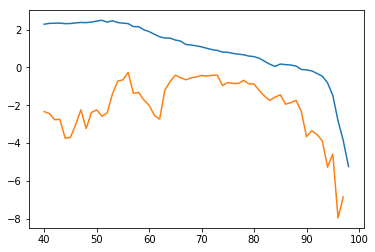

In [37]:
plt.plot(snaps_list,np.log(total_mass_list))
plt.plot(snaps_list,np.log(cold_mass_list))
plt.savefig('329508.png')


In [29]:
plt.close('all')


In [38]:
def calculate_stars_mass(snap_num, subhalo_id):
    stars_fields = ['Masses']
    subhalo_data = il.snapshot.loadSubhalo(basePath, snap_num, subhalo_id, 4, fields=stars_fields)
    if len(subhalo_data) == 1:
        return 0



    stars_mass = subhalo_data.sum()

    return stars_mass


In [60]:
stars_list=[]
snaps_list=[]
for current_subfind_id,current_snapshot_num in Binary_DataIter(subfindid_snapnum_tree0['SubfindID'],subfindid_snapnum_tree0['SnapNum']):
    if current_snapshot_num < 40: break
    star_mass=calculate_stars_mass(current_snapshot_num,current_subfind_id)
    stars_list.append(star_mass)
    snaps_list.append(current_snapshot_num)


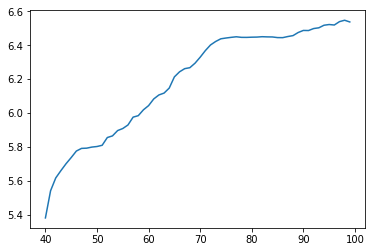

In [70]:
plt.plot(subfindid_snapnum_tree0['SnapNum'][0:60],np.log(subfindid_snapnum_tree0['Mass'][0:60]))
plt.savefig('dm.png')


In [54]:
plt.clf()


<Figure size 432x288 with 0 Axes>

In [53]:
plt.show()
